# Descriptive Analytics Project

## Abstract

This descriptive analysis project aims to identify the most conflict-prone points in Ecuadorian provinces by analyzing arrest data. The study focuses on three key objectives: determining the points in provinces with the highest overall arrest rates, identifying the primary reasons for arrests, and exploring patterns and trends in arrests across different provinces.

Data for the analysis was obtained from official crime reports and government statistics, covering from january to april 2023. The dataset includes information on the reasons for arrest and corresponding provinces, the day, hour. A thorough data cleaning process was undertaken to address inconsistencies and missing values, ensuring the accuracy and reliability of the analysis to get thrusted conclusions.

## Background

The issue of insecurity in Ecuador is a major concern for citizens, with a high rate of homicides and a surge in crime and violence in cities such as Guayaquil [2]. The porous land borders with Colombia and Peru make Ecuador a point of departure for drug trafficking to the US and Europe, leading to violence within the prison system and on the streets [2]. The country's prisons are overcrowded and lack state control, leading to gang members committing massacres that have killed over 400 detainees since 2021 [1]. However, the government has responded by increasing security presence in the streets and attributing the situation to international drug trafficking [2]. The State has a responsibility to guarantee human security through integrated policies and actions to prevent violence and discrimination [3].

1 [Informe mundial 2023 Ecuador](https://www.hrw.org/es/world-report/2023/country-chapters/ecuador) \
2 [La inseguridad en Ecuador encierra en casa a los ciudadanos](https://elpais.com/internacional/2022-02-08/la-inseguridad-en-ecuador-encierra-en-casa-a-los-ciudadanos-y-saca-a-los-militares-a-las-calles.html) \
3 [Plan específico - de seguridad pública y ciudadana](https://www.defensa.gob.ec/wp-content/uploads/downloads/2019/07/plan-nacional-min-interior-web.pdf)

## Objetives
* To use descriptive data analysis techniques to identify geographic patterns of apprehension or detention of citizens for
different crimes in Ecuadorian territory.
* To Identify red points, it seeks to provide information to law enforcement authorities so they can
focus their efforts effectively and reduce the crime rate in these
areas considered dangerous.
* To explore patterns and trends in arrests across different provinces.

## Metodologies
1. Frequency analysis: Examines the frequency of arrests for each reason in the different provinces. It identifies the most common motives and determines whether there are significant differences between provinces in terms of frequency of arrests by motive.

2. Analysis of proportions: Calculate the proportions of arrests by reason in each province. Compare the proportions to identify the reasons that have a higher relative incidence in each province and determine if there are significant differences between them.

3. Trend analysis: Perform a temporal analysis of arrests by reason in each province to identify potential trends or changes over time. You can use line or bar graphs to visualize the fluctuations throughout the analyzed period.

4. Spatial analysis: Use spatial analysis techniques to identify the points of greatest conflict in the provinces. You can use arrest georeferencing and generate heat maps or dot plots to visualize the spatial concentration of arrests by reason in each province.

5. Comparative analysis: Make comparisons between provinces to identify those that present the highest arrest rates or significant differences in terms of the reasons for arrest. You can use statistical tests such as the Student's t test or ANOVA to determine the significance of the differences.

6. Correlation analysis: Explores possible relationships or correlations between the reasons for arrest and other relevant factors, such as the demographics of the provinces or socioeconomic variables. It uses correlation coefficients, such as the Pearson correlation coefficient or the Spearman correlation coefficient, to assess the strength and direction of relationships.

## Data preparation

### Libraries impotation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer

### Load the data

In [ ]:
df = pd.read_excel("/content/mdg_detenidosaprehendidos_pm_2023_enero_abril.xlsx")
df.head()

,tipo,edad,sexo,nacionalidad,autoidentificacion_etnica,numero_detenciones,nombre_provincia,nombre_canton,nombre_parroquia,nombre_zona,...,nombre_circuito,codigo_circuito,nombre_subcircuito,codigo_subcircuito,lugar,presunta_infraccion,presunta_subinfraccion,fecha_detencion_aprehension,hora_detencion_aprehension,presunta_flagrancia
0,APREHENDIDO,21,HOMBRE,ECUATORIANO,MESTIZO/A,0,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,SANTO DOMINGO DE LOS COLORADOS,ZONA 4,...,CENTRO,23D01C02,CENTRO 3,23D01C02S03,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ROBO A PERSONAS,2023-04-01,13:55:00,SI
1,DETENIDO,35,HOMBRE,ECUATORIANO,MESTIZO/A,0,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,SANTO DOMINGO DE LOS COLORADOS,ZONA 4,...,UNIFICADOS,23D01C06,UNIFICADOS 2,23D01C06S02,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ROBO A DOMICILIO,2023-01-09,03:10:00,SI
2,APREHENDIDO,SIN DATO,HOMBRE,ECUATORIANO,MESTIZO/A,0,ESMERALDAS,RIOVERDE,CHUMUNDE,ZONA 1,...,PALESTINA,08D06C01,PALESTINA 3,08D06C01S03,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,OTROS ROBOS,2023-02-25,11:30:00,SI
3,APREHENDIDO,22,HOMBRE,ECUATORIANO,MESTIZO/A,0,LOS RIOS,QUEVEDO,QUEVEDO,ZONA 5,...,GALO PLAZA,12D03C05,GALO PLAZA 1,12D03C05S01,CASA/VILLA,DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE...,TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJE...,2023-02-16,22:45:00,NO
4,APREHENDIDO,SIN DATO,HOMBRE,VENEZOLANO,MESTIZO/A,0,EL ORO,MACHALA,MACHALA,ZONA 7,...,CRISTO DEL CONSUELO,07D02C16,CRISTO DEL CONSUELO 2,07D02C16S02,VÍA PÚBLICA,DELITOS CONTRA LA EFICIENCIA DE LA ADMINISTRAC...,INCUMPLIMIENTO DE DECISIONES LEGÍTIMAS DE AUTO...,2023-02-14,14:50:00,SI


### Variables' variability

In [ ]:
#variability in numero_detencio
numero_detenciones = df['numero_detenciones'].value_counts()
numero_detenciones

0    25576
1        1
Name: numero_detenciones, dtype: int64

In [ ]:
#variability in nacionalidad
nacionalidad = df['nacionalidad'].value_counts()
nacionalidad

ECUATORIANO       23859
VENEZOLANO          897
COLOMBIANO          685
PERUANO              69
DOMINICANO           11
CHINO                10
CUBANO               10
ARGENTINO             5
SIN DATO              4
TAIWANES              3
ESTADOUNIDENCE        3
ITALIANO              2
JORDANO               2
ESTONIO               2
ESPAÑOL               2
GEORGIANO             2
HAITIANO              2
BOLIVIANO             1
ECUATOGUINEANO        1
NIGERIANO             1
KIRGUÍS               1
ALBANO                1
CANADIENSE            1
CHILENO               1
GUATEMALTECO          1
MEXICANO              1
Name: nacionalidad, dtype: int64

In [ ]:
#variability in autoidentificacion_etnica y nacionalidad
nacionalidades_filter = ['ECUATORIANO', 'VENEZOLANO', 'COLOMBIANO']
df = df.query("nacionalidad in @nacionalidades_filter")

In [ ]:
nacionalidad = df['nacionalidad'].value_counts()
nacionalidad

ECUATORIANO    23859
VENEZOLANO       897
COLOMBIANO       685
Name: nacionalidad, dtype: int64

eliminar \
numeroDetenciones \
autoidentificaciónentica \
nombre de subzona == nombre cantón \
nombre subcircuito


In [ ]:
agrupado = df.groupby(['nombre_canton', 'nombre_subzona']).aggregate('sum')
display(agrupado)

<ipython-input-7-7c4e9fd5baa9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupado = df.groupby(['nombre_canton', 'nombre_subzona']).aggregate('sum')


,,numero_detenciones
nombre_canton,nombre_subzona,
24 DE MAYO,MANABI,0
AGUARICO,ORELLANA,0
ALAUSI,CHIMBORAZO,0
ALFREDO BAQUERIZO MORENO,GUAYAS,0
AMBATO,TUNGURAHUA,0
...,...,...
YACUAMBI,ZAMORA CHINCHIPE,0
YANTZAZA,ZAMORA CHINCHIPE,0
ZAMORA,ZAMORA CHINCHIPE,0


In [ ]:
agrupado = df.groupby(['nombre_circuito', 'nombre_subcircuito']).aggregate('sum')
display(agrupado)

<ipython-input-8-668d415e8ed9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupado = df.groupby(['nombre_circuito', 'nombre_subcircuito']).aggregate('sum')


,,numero_detenciones
nombre_circuito,nombre_subcircuito,
1 DE MAYO,1 DE MAYO 1,0
10 DE AGOSTO,10 DE AGOSTO 1,0
12 DE DICIEMBRE,12 DE DICIEMBRE 1,0
15 DE MAYO,15 DE MAYO 1,0
19 DE NOVIEMBRE,19 DE NOVIEMBRE 1,0
...,...,...
ZAPOTILLO,ZAPOTILLO 1,0
ZARUMA,ZARUMA 1,0
ZUMBA,ZUMBA 1,0


### Recomended variables to be deleted

1. autoidentificacion_etnica \
2. numero_detenciones \
3. nombre_subzona \
4. codigo_distrito \
5. codigo_circuito \
6. nombre_subcircuito \
7. codigo_subcircuito

### Delete variables

In [ ]:
deleted_variables = ['autoidentificacion_etnica', 'numero_detenciones', 'nombre_subzona','codigo_distrito','codigo_circuito', 'nombre_subcircuito', 'codigo_subcircuito']
df = df.drop(deleted_variables, axis=1)
df.to_excel('deleted_7Variables.xlsx',index=False)

In [ ]:
df.head()

,tipo,edad,sexo,nacionalidad,nombre_provincia,nombre_canton,nombre_parroquia,nombre_zona,nombre_distrito,nombre_circuito,lugar,presunta_infraccion,presunta_subinfraccion,fecha_detencion_aprehension,hora_detencion_aprehension,presunta_flagrancia
0,APREHENDIDO,21,HOMBRE,ECUATORIANO,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,SANTO DOMINGO DE LOS COLORADOS,ZONA 4,SANTO DOMINGO ESTE,CENTRO,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ROBO A PERSONAS,2023-04-01,13:55:00,SI
1,DETENIDO,35,HOMBRE,ECUATORIANO,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,SANTO DOMINGO DE LOS COLORADOS,ZONA 4,SANTO DOMINGO ESTE,UNIFICADOS,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ROBO A DOMICILIO,2023-01-09,03:10:00,SI
2,APREHENDIDO,SIN DATO,HOMBRE,ECUATORIANO,ESMERALDAS,RIOVERDE,CHUMUNDE,ZONA 1,RIO VERDE,PALESTINA,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,OTROS ROBOS,2023-02-25,11:30:00,SI
3,APREHENDIDO,22,HOMBRE,ECUATORIANO,LOS RIOS,QUEVEDO,QUEVEDO,ZONA 5,QUEVEDO,GALO PLAZA,CASA/VILLA,DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE...,TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJE...,2023-02-16,22:45:00,NO
4,APREHENDIDO,SIN DATO,HOMBRE,VENEZOLANO,EL ORO,MACHALA,MACHALA,ZONA 7,MACHALA,CRISTO DEL CONSUELO,VÍA PÚBLICA,DELITOS CONTRA LA EFICIENCIA DE LA ADMINISTRAC...,INCUMPLIMIENTO DE DECISIONES LEGÍTIMAS DE AUTO...,2023-02-14,14:50:00,SI


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25441 entries, 0 to 25576
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   tipo                         25441 non-null  object        
 1   edad                         25441 non-null  object        
 2   sexo                         25441 non-null  object        
 3   nacionalidad                 25441 non-null  object        
 4   nombre_provincia             25441 non-null  object        
 5   nombre_canton                25441 non-null  object        
 6   nombre_parroquia             25441 non-null  object        
 7   nombre_zona                  25441 non-null  object        
 8   nombre_distrito              25441 non-null  object        
 9   nombre_circuito              25441 non-null  object        
 10  lugar                        25441 non-null  object        
 11  presunta_infraccion          25441 non-nu

### Null values

In [ ]:
df.isnull().sum()

tipo                           0
edad                           0
sexo                           0
nacionalidad                   0
nombre_provincia               0
nombre_canton                  0
nombre_parroquia               0
nombre_zona                    0
nombre_distrito                0
nombre_circuito                0
lugar                          0
presunta_infraccion            0
presunta_subinfraccion         0
fecha_detencion_aprehension    0
hora_detencion_aprehension     0
presunta_flagrancia            0
dtype: int64

In [ ]:
df.replace('SIN DATO', np.nan, inplace=True)

In [ ]:
df.isnull().sum()

tipo                             0
edad                           371
sexo                             0
nacionalidad                     0
nombre_provincia                 0
nombre_canton                    0
nombre_parroquia                 0
nombre_zona                      0
nombre_distrito                  0
nombre_circuito                  0
lugar                            0
presunta_infraccion              0
presunta_subinfraccion           0
fecha_detencion_aprehension      0
hora_detencion_aprehension       0
presunta_flagrancia              0
dtype: int64

### Imputation

In [ ]:
#simple imputation -> 371 registers
mean = df['edad'].mean()
df['edad'].fillna(mean,  inplace=True)

In [ ]:
df.isnull().sum()

tipo                           0
edad                           0
sexo                           0
nacionalidad                   0
nombre_provincia               0
nombre_canton                  0
nombre_parroquia               0
nombre_zona                    0
nombre_distrito                0
nombre_circuito                0
lugar                          0
presunta_infraccion            0
presunta_subinfraccion         0
fecha_detencion_aprehension    0
hora_detencion_aprehension     0
presunta_flagrancia            0
dtype: int64

In [ ]:
df.head()

,tipo,edad,sexo,nacionalidad,nombre_provincia,nombre_canton,nombre_parroquia,nombre_zona,nombre_distrito,nombre_circuito,lugar,presunta_infraccion,presunta_subinfraccion,fecha_detencion_aprehension,hora_detencion_aprehension,presunta_flagrancia
0,APREHENDIDO,21.000000,HOMBRE,ECUATORIANO,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,SANTO DOMINGO DE LOS COLORADOS,ZONA 4,SANTO DOMINGO ESTE,CENTRO,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ROBO A PERSONAS,2023-04-01,13:55:00,SI
1,DETENIDO,35.000000,HOMBRE,ECUATORIANO,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,SANTO DOMINGO DE LOS COLORADOS,ZONA 4,SANTO DOMINGO ESTE,UNIFICADOS,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ROBO A DOMICILIO,2023-01-09,03:10:00,SI
2,APREHENDIDO,32.043598,HOMBRE,ECUATORIANO,ESMERALDAS,RIOVERDE,CHUMUNDE,ZONA 1,RIO VERDE,PALESTINA,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,OTROS ROBOS,2023-02-25,11:30:00,SI
3,APREHENDIDO,22.000000,HOMBRE,ECUATORIANO,LOS RIOS,QUEVEDO,QUEVEDO,ZONA 5,QUEVEDO,GALO PLAZA,CASA/VILLA,DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE...,TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJE...,2023-02-16,22:45:00,NO
4,APREHENDIDO,32.043598,HOMBRE,VENEZOLANO,EL ORO,MACHALA,MACHALA,ZONA 7,MACHALA,CRISTO DEL CONSUELO,VÍA PÚBLICA,DELITOS CONTRA LA EFICIENCIA DE LA ADMINISTRAC...,INCUMPLIMIENTO DE DECISIONES LEGÍTIMAS DE AUTO...,2023-02-14,14:50:00,SI


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25441 entries, 0 to 25576
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   tipo                         25441 non-null  object        
 1   edad                         25441 non-null  float64       
 2   sexo                         25441 non-null  object        
 3   nacionalidad                 25441 non-null  object        
 4   nombre_provincia             25441 non-null  object        
 5   nombre_canton                25441 non-null  object        
 6   nombre_parroquia             25441 non-null  object        
 7   nombre_zona                  25441 non-null  object        
 8   nombre_distrito              25441 non-null  object        
 9   nombre_circuito              25441 non-null  object        
 10  lugar                        25441 non-null  object        
 11  presunta_infraccion          25441 non-nu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25441 entries, 0 to 25576
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   tipo                         25441 non-null  object        
 1   edad                         25441 non-null  float64       
 2   sexo                         25441 non-null  object        
 3   nacionalidad                 25441 non-null  object        
 4   nombre_provincia             25441 non-null  object        
 5   nombre_canton                25441 non-null  object        
 6   nombre_parroquia             25441 non-null  object        
 7   nombre_zona                  25441 non-null  object        
 8   nombre_distrito              25441 non-null  object        
 9   nombre_circuito              25441 non-null  object        
 10  lugar                        25441 non-null  object        
 11  presunta_infraccion          25441 non-nu

In [ ]:
# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha_detencion_aprehension'])

# Extraer el mes y el día en nuevas columnas
df['mes'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.day
df.head()

,tipo,edad,sexo,nacionalidad,nombre_provincia,nombre_canton,nombre_parroquia,nombre_zona,nombre_distrito,nombre_circuito,lugar,presunta_infraccion,presunta_subinfraccion,fecha_detencion_aprehension,hora_detencion_aprehension,presunta_flagrancia,fecha,mes,dia
0,APREHENDIDO,21.000000,HOMBRE,ECUATORIANO,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,SANTO DOMINGO DE LOS COLORADOS,ZONA 4,SANTO DOMINGO ESTE,CENTRO,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ROBO A PERSONAS,2023-04-01,13:55:00,SI,2023-04-01,4,1
1,DETENIDO,35.000000,HOMBRE,ECUATORIANO,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,SANTO DOMINGO DE LOS COLORADOS,ZONA 4,SANTO DOMINGO ESTE,UNIFICADOS,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ROBO A DOMICILIO,2023-01-09,03:10:00,SI,2023-01-09,1,9
2,APREHENDIDO,32.043598,HOMBRE,ECUATORIANO,ESMERALDAS,RIOVERDE,CHUMUNDE,ZONA 1,RIO VERDE,PALESTINA,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,OTROS ROBOS,2023-02-25,11:30:00,SI,2023-02-25,2,25
3,APREHENDIDO,22.000000,HOMBRE,ECUATORIANO,LOS RIOS,QUEVEDO,QUEVEDO,ZONA 5,QUEVEDO,GALO PLAZA,CASA/VILLA,DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE...,TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJE...,2023-02-16,22:45:00,NO,2023-02-16,2,16
4,APREHENDIDO,32.043598,HOMBRE,VENEZOLANO,EL ORO,MACHALA,MACHALA,ZONA 7,MACHALA,CRISTO DEL CONSUELO,VÍA PÚBLICA,DELITOS CONTRA LA EFICIENCIA DE LA ADMINISTRAC...,INCUMPLIMIENTO DE DECISIONES LEGÍTIMAS DE AUTO...,2023-02-14,14:50:00,SI,2023-02-14,2,14


In [ ]:
# Convert the 'hora' column to string type
df['hora'] = df['hora_detencion_aprehension'].astype(str)

# Extract the hour from the 'hora' column
df['hour'] = df['hora'].str.split(':').str.get(0)

# Show the resulting DataFrame
df.head()

,tipo,edad,sexo,nacionalidad,nombre_provincia,nombre_canton,nombre_parroquia,nombre_zona,nombre_distrito,nombre_circuito,...,presunta_infraccion,presunta_subinfraccion,fecha_detencion_aprehension,hora_detencion_aprehension,presunta_flagrancia,fecha,mes,dia,hora,hour
0,APREHENDIDO,21.000000,HOMBRE,ECUATORIANO,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,SANTO DOMINGO DE LOS COLORADOS,ZONA 4,SANTO DOMINGO ESTE,CENTRO,...,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ROBO A PERSONAS,2023-04-01,13:55:00,SI,2023-04-01,4,1,13:55:00,13
1,DETENIDO,35.000000,HOMBRE,ECUATORIANO,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,SANTO DOMINGO DE LOS COLORADOS,ZONA 4,SANTO DOMINGO ESTE,UNIFICADOS,...,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ROBO A DOMICILIO,2023-01-09,03:10:00,SI,2023-01-09,1,9,03:10:00,03
2,APREHENDIDO,32.043598,HOMBRE,ECUATORIANO,ESMERALDAS,RIOVERDE,CHUMUNDE,ZONA 1,RIO VERDE,PALESTINA,...,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,OTROS ROBOS,2023-02-25,11:30:00,SI,2023-02-25,2,25,11:30:00,11
3,APREHENDIDO,22.000000,HOMBRE,ECUATORIANO,LOS RIOS,QUEVEDO,QUEVEDO,ZONA 5,QUEVEDO,GALO PLAZA,...,DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE...,TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJE...,2023-02-16,22:45:00,NO,2023-02-16,2,16,22:45:00,22
4,APREHENDIDO,32.043598,HOMBRE,VENEZOLANO,EL ORO,MACHALA,MACHALA,ZONA 7,MACHALA,CRISTO DEL CONSUELO,...,DELITOS CONTRA LA EFICIENCIA DE LA ADMINISTRAC...,INCUMPLIMIENTO DE DECISIONES LEGÍTIMAS DE AUTO...,2023-02-14,14:50:00,SI,2023-02-14,2,14,14:50:00,14


### Delete fecha_detencion_aprehension	 and hora

In [ ]:
deleted_variables = ['fecha_detencion_aprehension','hora_detencion_aprehension','fecha', 'hora']
df = df.drop(deleted_variables, axis=1)
df.head()

,tipo,edad,sexo,nacionalidad,nombre_provincia,nombre_canton,nombre_parroquia,nombre_zona,nombre_distrito,nombre_circuito,lugar,presunta_infraccion,presunta_subinfraccion,presunta_flagrancia,mes,dia,hour
0,APREHENDIDO,21.000000,HOMBRE,ECUATORIANO,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,SANTO DOMINGO DE LOS COLORADOS,ZONA 4,SANTO DOMINGO ESTE,CENTRO,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ROBO A PERSONAS,SI,4,1,13
1,DETENIDO,35.000000,HOMBRE,ECUATORIANO,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,SANTO DOMINGO DE LOS COLORADOS,ZONA 4,SANTO DOMINGO ESTE,UNIFICADOS,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,ROBO A DOMICILIO,SI,1,9,03
2,APREHENDIDO,32.043598,HOMBRE,ECUATORIANO,ESMERALDAS,RIOVERDE,CHUMUNDE,ZONA 1,RIO VERDE,PALESTINA,VÍA PÚBLICA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,OTROS ROBOS,SI,2,25,11
3,APREHENDIDO,22.000000,HOMBRE,ECUATORIANO,LOS RIOS,QUEVEDO,QUEVEDO,ZONA 5,QUEVEDO,GALO PLAZA,CASA/VILLA,DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE...,TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJE...,NO,2,16,22
4,APREHENDIDO,32.043598,HOMBRE,VENEZOLANO,EL ORO,MACHALA,MACHALA,ZONA 7,MACHALA,CRISTO DEL CONSUELO,VÍA PÚBLICA,DELITOS CONTRA LA EFICIENCIA DE LA ADMINISTRAC...,INCUMPLIMIENTO DE DECISIONES LEGÍTIMAS DE AUTO...,SI,2,14,14


In [ ]:
df['nombre_provincia'] = df['nombre_provincia'].replace('SANTO DOMINGO DE LOS TSACHILAS', 'STO-DGO T', regex=True)
register_provinces = df['nombre_provincia'].value_counts()

## Descriptive Analytics

In [ ]:
#agrupo por sexo y tipo
grupo_sexo_detenido_aprehendido = df.groupby(by=['sexo', 'tipo'])
#print(grupo_sexo_detenido_aprehendido)
output = grupo_sexo_detenido_aprehendido.size().reset_index(name='numero_de_registros')

,sexo,tipo,numero_de_registros
0,HOMBRE,APREHENDIDO,16874
1,HOMBRE,DETENIDO,6085
2,INTERSEXUAL,APREHENDIDO,6
3,MUJER,APREHENDIDO,1864
4,MUJER,DETENIDO,612


ValueError: ignored

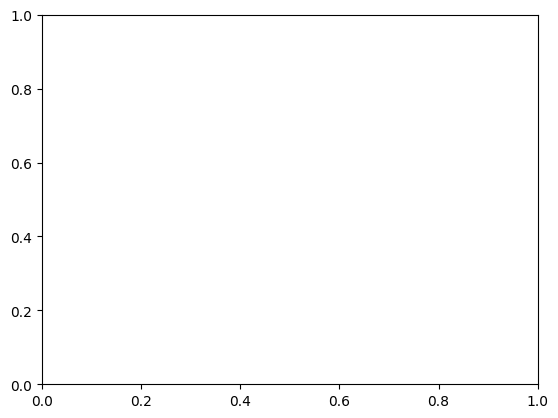

In [ ]:
# Agrupación y cálculo del recuento de registros
grupo_sexo_detenido_aprehendido = df.groupby(by=['sexo', 'tipo'])
output = grupo_sexo_detenido_aprehendido.size().reset_index(name='numero_de_registros')

# Crear gráfico de barras agrupadas
labels = output['sexo'].unique()
aprehendido_data = output[output['tipo'] == 'APREHENDIDO']['numero_de_registros']
detenido_data = output[output['tipo'] == 'DETENIDO']['numero_de_registros']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, aprehendido_data, width, label='aprehendido')
rects2 = ax.bar(x + width/2, detenido_data, width, label='Detenido')

ax.set_xlabel('Sexo')
ax.set_ylabel('Número de registros')
ax.set_title('Recuento de registros por sexo y tipo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


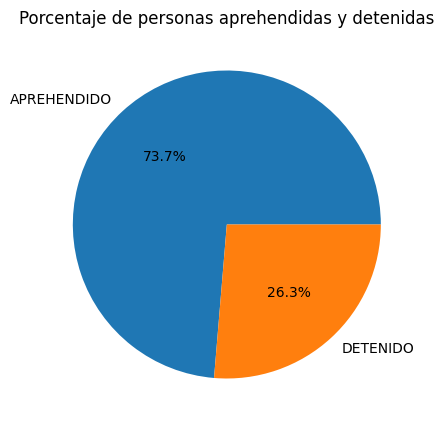

In [ ]:
#cout the registers
detenido_aprehendido = df['tipo'].value_counts()
detenido_aprehendido
#draw pie chart
detenido_aprehendido.plot(kind = 'pie', figsize=(5,5), autopct = '%1.1f%%')
plt.title('Porcentaje de personas aprehendidas y detenidas')
plt.ylabel('')
plt.show()

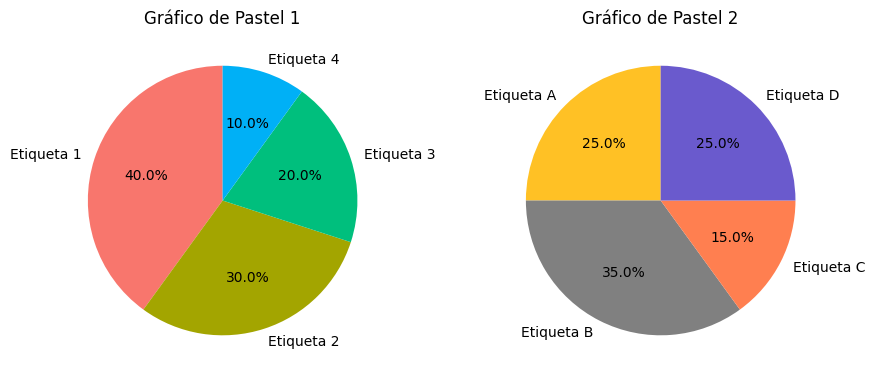

In [ ]:
import matplotlib.pyplot as plt
#cout the registers
detenido_aprehendido = df['tipo'].value_counts()
detenido_aprehendido
#draw pie chart
detenido_aprehendido.plot(kind = 'pie', figsize=(5,5), autopct = '%1.1f%%')
plt.title('Porcentaje de personas aprehendidas y detenidas')
plt.ylabel('')
plt.show()

# Datos para el primer gráfico de pastel
valores1 = [40, 30, 20, 10]
etiquetas1 = ['Etiqueta 1', 'Etiqueta 2', 'Etiqueta 3', 'Etiqueta 4']
colores1 = ['#F8766D', '#A3A500', '#00BF7D', '#00B0F6']

# Datos para el segundo gráfico de pastel
valores2 = [25, 35, 15, 25]
etiquetas2 = ['Etiqueta A', 'Etiqueta B', 'Etiqueta C', 'Etiqueta D']
colores2 = ['#FFC125', '#808080', '#FF7F50', '#6A5ACD']

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Primer gráfico de pastel
ax1.pie(detenido_aprehendido, labels=df['tipo'].uni , autopct='%1.1f%%', startangle=90)
ax1.set_title('Gráfico de Pastel 1')

# Segundo gráfico de pastel
ax2.pie(valores2, labels=etiquetas2, colors=colores2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Gráfico de Pastel 2')

# Ajustar el espaciado entre los subplots
plt.subplots_adjust(wspace=0.3)

# Mostrar los gráficos
plt.show()


### **Provincias Peligrosas**

Text(0.5, 1.0, 'N° de Delitos cometidos por provincia')

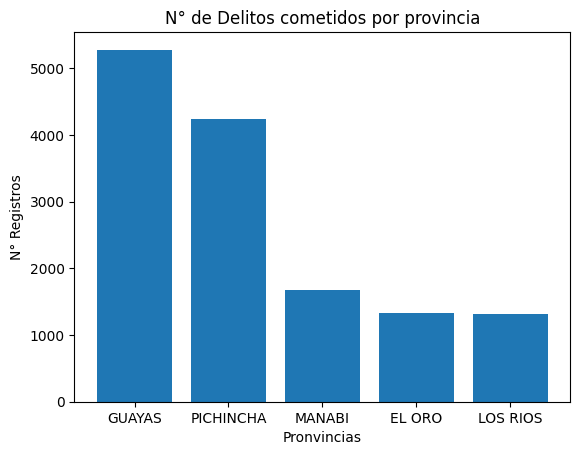

In [ ]:
# frecuency
provincias_counts = df['nombre_provincia'].value_counts().head(5)
plt.bar(provincias_counts.index, provincias_counts.values)
plt.ylabel('N° Registros')
plt.xlabel('Pronvincias')
plt.title('N° de Delitos cometidos por provincia')

In [ ]:
# frecuency
df['nombre_canton'] = df['nombre_canton'].replace('SANTO DOMINGO', 'STO-DGO', regex=True)
canton_counts = df['nombre_canton'].value_counts().head(5)
plt.bar(canton_counts.index, canton_counts.values)

In [ ]:
sexo_value = df['sexo'].value_counts()
print(sexo_value)
sexo_value.plot(kind = 'pie', figsize=(4,4),autopct='%1.1f%%')
plt.title('Hombres - Mujeres')
plt.ylabel('')
plt.show()

##

## provincias, cantones group by

In [ ]:
# Agrupar por provincias y cantones y contar los registros
grouped = df.groupby(['nombre_provincia', 'nombre_canton']).size().reset_index(name='count')

# Ordenar en orden descendente por la cantidad de registros
grouped = grouped.sort_values('count', ascending=False)

# Obtener el top 5
top_5 = grouped.head(5)

print(top_5)

# Crear el gráfico de barras
plt.bar(top_5['nombre_provincia'] + ' - ' + top_5['nombre_canton'], top_5['count'])
plt.xlabel('Combinación Provincia - Cantón')
plt.ylabel('Recuento')
plt.title('Top 5 de combinaciones Provincia - Cantón')

# Mostrar el gráfico
plt.show()